<a href="https://colab.research.google.com/github/albehma/Image3DRecostruction/blob/main/3DProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project B.3 by Alberto Mautone and Arina Prostakova
**Local feature compression using autoencoders - embedded machine learning**

Design a compression strategy for local SURF descriptors using autoencoders. Training data can be generated using the images of dataset Portello
and Castle. Testing must be done on dataset FountainP-11 and Tiso (available at https://github.com/openMVG/SfM_quality_evaluation/tree/master/Benchmarking_Camera_Calibration_2008 and http://www.dei.unipd.it/~sim1mil/materiale/3Drecon/). Software must be implemented in Python
TF (Keras).

> **Testing on ML boards**
>
> Final tests will be carried on ST Microelectronics chipset
STM32L476. Using the STM suite it is possible to deploy the json and h5 models (trained in Keras) on the
board, as well as controlling input and output. The designed autoencoder must be deployed on this ML board
and evaluated in terms of power comsumption and speed
(STM suite provides these diagnostics).
>
> Programming languages: Python.
>
> The ML boards are courtesy of ST Microelectronics.

## Importing data using GDrive

In [ ]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


In [ ]:
cd /gdrive/My Drive/3DAR_project/

/gdrive/.shortcut-targets-by-id/1nl7Gp0oMlyRlWl7RuNHeJ5o1UaSHy5cf/3DAR_project


In [ ]:
ls

autoencoder_json_100.json        autoencoder_model_tanh.h5
autoencoder_json_100_noreg.json  autoencoder_weights_100.h5
autoencoder_json_60.json         autoencoder_weights_100_noreg.h5
autoencoder_model_100.h5         autoencoder_weights_60.h5
autoencoder_model_100_noreg.h5   castle_keypoints/
autoencoder_model_60.h5          portello_keypoints/
autoencoder_model.h5             test_data/


In [ ]:
#training datasets
portello_link = 'https://github.com/arina-pro/3d-ar-project/tree/main/portello'
castle_link = 'https://github.com/openMVG/SfM_quality_evaluation/tree/master/Benchmarking_Camera_Calibration_2008/castle-P30/images'

In [ ]:
#testing datasets
fountain_link = 'https://github.com/openMVG/SfM_quality_evaluation/tree/master/Benchmarking_Camera_Calibration_2008/fountain-P11/images'
tiso_link = 'https://github.com/arina-pro/3d-ar-project/tree/main/tiso'

## Extracting SURF features

In [ ]:
#Packages to use SURF
!pip install opencv-python==3.4.2.17
!pip install opencv-contrib-python==3.4.2.17

     |████████████████████████████████| 25.0MB 3.4MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: opencv-python 4.1.2.30
    Uninstalling opencv-python-4.1.2.30:
      Successfully uninstalled opencv-python-4.1.2.30
     |████████████████████████████████| 30.6MB 159kB/s 
  Found existing installation: opencv-contrib-python 4.1.2.30
    Uninstalling opencv-contrib-python-4.1.2.30:
      Successfully uninstalled opencv-contrib-python-4.1.2.30


In [ ]:
import numpy as np
import pandas as pd
import cv2
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from PIL import Image 
import matplotlib.pylab as plt

In [ ]:
#version check
print(cv2.__version__)

3.4.2


In [ ]:
#Getting a SURF descriptor
surf = cv2.xfeatures2d.SURF_create() #for training we're using no threshold
surf.setExtended(True)

In [ ]:
import glob
#PORTELLO
path = glob.glob("/content/*.jpg")
cv_img = []
for img in path:
    n = cv2.imread(img)
    cv_img.append(n)

In [ ]:
import csv

In [ ]:
from google.colab import files

for k in range(len(cv_img)):
  portello = cv_img[k]
  keypoints_surf, descriptors = surf.detectAndCompute(portello, None)
  file_name = "portello" + str(k) + ".txt"
  File_object = open(file_name, "w")
  for i in range(descriptors.shape[0]):
    File_object.write("[")
    for j in range(descriptors.shape[1]):
      if (j==descriptors.shape[1]-1):
        File_object.write(str(descriptors[i][j]))
      else:
        File_object.write(str(descriptors[i][j])+", ")
    File_object.write("]\n")
  File_object.close()
  File_object = open(file_name, "r")
  File_object.read()
  files.download(file_name)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import glob
#CASTLE
path = glob.glob("/content/*.jpg")
cv_img_castle = []
for img in path:
    n = cv2.imread(img)
    cv_img_castle.append(n)
print(len(cv_img_castle))

30


In [ ]:
from google.colab import files

for k in range(len(cv_img_castle)):
  castle = cv_img_castle[k]
  keypoints_surf, descriptors = surf.detectAndCompute(castle, None)
  file_name = "_castle" + str(k) + ".txt"
  File_object = open(file_name, "w")
  for i in range(descriptors.shape[0]):
    File_object.write("[")
    for j in range(descriptors.shape[1]):
      if (j==descriptors.shape[1]-1):
        File_object.write(str(descriptors[i][j]))
      else:
        File_object.write(str(descriptors[i][j])+", ")
    File_object.write("]\n")
  File_object.close()
  File_object = open(file_name, "r")
  File_object.read()
  files.download(file_name)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Building Autoencoder

### Data loading and preprocessing

Trying to read floats from the txt files

In [ ]:
from pathlib import Path
import numpy as np

i = 0
X = np.zeros((1049295, 128))
entries = Path('.')
for entry in entries.iterdir():
    for file_name in entry.iterdir():
        #if i == 11:
          #print(file_name)
          with open(file_name, 'rt') as f:
              data = f.read()
          data = data.replace('[','')
          fs = data.split(sep=']\n')
          fs.pop()
          #print(fs[0])
          for f in fs:
            X[i] = np.array(list(map(float, f.split(','))))
            i += 1

Every feature has 128 floating points

In [ ]:
max([np.size(lists[i]) for i in range(len(lists))])

128

But the number of features is different. The max is 25571, the min is 3747, the total number of files is 90. The mean is 11658.833333333334, and the number of features in all the files is 1049295.

In [ ]:
max(len_of_f), min(len_of_f), len(len_of_f)

(25571, 3747, 90)

In [ ]:
len_of_f[-10:], np.mean(len_of_f), sum(len_of_f)

([21611, 22995, 23118, 24089, 24081, 23936, 24826, 25024, 25226, 25571],
 11658.833333333334,
 1049295)

The feature points, all in one dataset.

In [ ]:
X[-1]

array([-1.44199510e-04,  5.51818300e-04, -4.50025400e-03,  7.86423600e-03,
       -4.27127400e-04,  4.67859650e-04, -3.82459260e-04,  4.56417900e-04,
        3.92690900e-02,  5.35486040e-02, -5.04351670e-02,  5.65274250e-02,
        3.67816100e-03,  4.05892730e-03, -1.82176540e-03,  3.70893300e-03,
        1.51151110e-02,  3.21395730e-02,  5.13875100e-03,  1.70906220e-02,
        9.74868700e-04,  5.87202050e-03, -1.18556550e-04,  1.95209400e-03,
        6.15387050e-04,  8.19851640e-04, -2.19461230e-03,  5.45217560e-03,
       -7.43548970e-04,  1.31980360e-03, -1.51804020e-03,  1.96205340e-03,
       -2.36851600e-02,  4.53369240e-02, -8.41672770e-04,  8.71586500e-03,
        1.52687980e-04,  4.59911260e-03,  5.14560700e-04,  9.33708500e-04,
       -2.40775870e-01,  4.55918300e-01,  1.64573070e-01,  2.66964380e-01,
       -1.24236380e-02,  2.61803750e-02,  4.47020350e-03,  1.79024430e-02,
        5.14616500e-03,  1.06442890e-01,  1.07022725e-01,  2.12633330e-01,
       -2.71896400e-02,  

In [ ]:
min([min(X[i]) for i in range(X.shape[0])]), max([max(X[i]) for i in range(X.shape[0])])

(-0.56301886, 0.8610955)

Using 1% as test data, since it's already enough. The dataset is very long.

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test = train_test_split(X, test_size=0.01, random_state=42)
x_train.shape, x_test.shape

(array([[-9.5865474e-04,  1.5423239e-03, -8.1824700e-04, ...,
          5.6340780e-03,  4.1057816e-04,  4.1057816e-04],
        [-1.2630781e-05,  9.9216650e-05,  2.0349894e-04, ...,
          5.6421810e-04,  1.0279511e-03,  1.0279511e-03],
        [ 1.2477237e-03,  1.1369608e-02, -1.8951286e-02, ...,
          5.0941897e-03,  1.2407094e-06,  3.5283902e-06],
        ...,
        [-2.2666955e-03,  3.7782262e-03,  1.0655190e-03, ...,
          3.3380445e-03, -6.9916610e-03,  6.9916610e-03],
        [ 1.9123164e-03,  2.1592810e-03,  7.8947630e-05, ...,
          2.7253813e-04, -1.1654355e-05,  2.8276076e-05],
        [-1.9435319e-03,  3.3665370e-03, -1.4294201e-02, ...,
          5.5066287e-03,  6.1947550e-03,  7.0650848e-03]]),
 array([[-4.5389400e-04,  1.4373813e-03,  1.5308244e-04, ...,
          2.4462247e-03,  2.9574945e-05,  3.0990643e-05],
        [-6.3222568e-03,  6.3592363e-03,  6.4058965e-03, ...,
          4.1908480e-04,  1.1912432e-04,  3.5400780e-04],
        [ 2.6490393e-03, 

### Building and compiling the model

using https://blog.keras.io/building-autoencoders-in-keras.html

In [ ]:
import keras
from keras import layers
from keras import regularizers

# This is the size of our encoded representations
encoding_dim = 32  # 20 floats -> compression of factor 6.4, assuming the input is 128 floats

# This is our input image
input = keras.Input(shape=(128,))
# "encoded" is the encoded representation of the input
encoded = layers.Dense(encoding_dim, activation='relu')(input)
#encoded = layers.Dense(encoding_dim, activation='relu',
#                activity_regularizer=regularizers.l1(10e-5))(input)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded = layers.Dense(32, activation='relu')(encoded)

# "decoded" is the lossy reconstruction of the input
decoded = layers.Dense(32, activation='relu')(encoded)
decoded = layers.Dense(64, activation='relu')(decoded)
decoded = layers.Dense(128, activation='tanh')(decoded)

# This model maps an input to its reconstruction
autoencoder = keras.Model(input, decoded)

# This model maps an input to its encoded representation
encoder = keras.Model(input, encoded)

autoencoder.compile(optimizer='adam', loss='mse', metrics=['accuracy', 'mse'])

n = 100
m = 256

This is just for reference.

In [ ]:
# This is our encoded input
encoded_input = keras.Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

**The results of trained models so far:**

after 30 epochs loss: 7.2275e-04 - val_loss: 7.2704e-04

50: loss: 8.1649e-04 - accuracy: 0.5823 - mse: 8.1649e-04 - val_loss: 8.2108e-04 - val_accuracy: 0.5739 - val_mse: 8.2108e-04

with 3 layers in the decoder: after 30 loss: 4.9462e-04 - accuracy: 0.6684 - mse: 4.9462e-04 - val_loss: 5.0059e-04 - val_accuracy: 0.6636 - val_mse: 5.0059e-04

with regularizer: loss: 4.5962e-04 - accuracy: 0.7099 - mse: 4.4200e-04 - val_loss: 4.6452e-04 - val_accuracy: 0.7138 - val_mse: 4.4691e-04

with 2 regularizers: loss: 5.8989e-04 - accuracy: 0.6455 - mse: 5.6350e-04 - val_loss: 6.0198e-04 - val_accuracy: 0.6468 - val_mse: 5.7574e-04

with 1 reg and 32 instead of 20 inp_dim, 30: loss: 3.5385e-04 - accuracy: 0.7778 - mse: 3.3788e-04 - val_loss: 3.5677e-04 - val_accuracy: 0.7703 - val_mse: 3.4057e-04

after 60: loss: 3.3013e-04 - accuracy: 0.7842 - mse: 3.1387e-04 - val_loss: 3.3297e-04 - val_accuracy: 0.7780 - val_mse: 3.1674e-04

100: loss: 3.0940e-04 - accuracy: 0.7932 - mse: 2.9367e-04 - val_loss: 3.1491e-04 - val_accuracy: 0.7877 - val_mse: 2.9920e-04

w/o reg: loss: 2.6505e-04 - accuracy: 0.7996 - mse: 2.6505e-04 - val_loss: 2.6707e-04 - val_accuracy: 0.8023 - val_mse: 2.6707e-04

### Training

In [ ]:
history = autoencoder.fit(x_train, x_train,
                epochs=n,
                batch_size=m,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/100
4058/4058 [==============================] - 11s 3ms/step - loss: 0.0012 - accuracy: 0.5530 - mse: 0.0012 - val_loss: 4.0463e-04 - val_accuracy: 0.7195 - val_mse: 4.0463e-04
Epoch 2/100
4058/4058 [==============================] - 11s 3ms/step - loss: 3.8300e-04 - accuracy: 0.7417 - mse: 3.8300e-04 - val_loss: 3.5367e-04 - val_accuracy: 0.7628 - val_mse: 3.5367e-04
Epoch 3/100
4058/4058 [==============================] - 11s 3ms/step - loss: 3.4821e-04 - accuracy: 0.7720 - mse: 3.4821e-04 - val_loss: 3.4710e-04 - val_accuracy: 0.7726 - val_mse: 3.4710e-04
Epoch 4/100
4058/4058 [==============================] - 11s 3ms/step - loss: 3.4166e-04 - accuracy: 0.7779 - mse: 3.4166e-04 - val_loss: 3.3813e-04 - val_accuracy: 0.7746 - val_mse: 3.3813e-04
Epoch 5/100
4058/4058 [==============================] - 11s 3ms/step - loss: 3.3331e-04 - accuracy: 0.7832 - mse: 3.3331e-04 - val_loss: 3.3615e-04 - val_accuracy: 0.7748 - val_mse: 3.3615e-04
Epoch 6/100
4058/4058 [===============

Looking through the history object to construct plots.

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'mse', 'val_loss', 'val_accuracy', 'val_mse'])

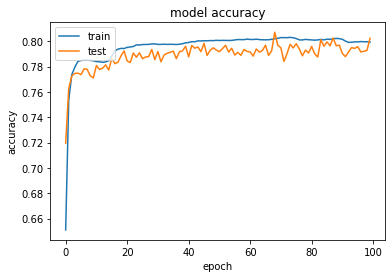

In [ ]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

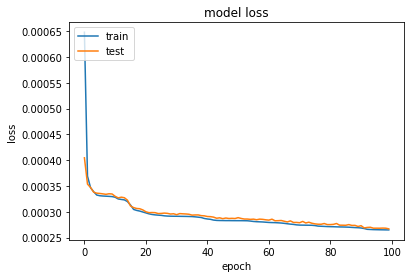

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

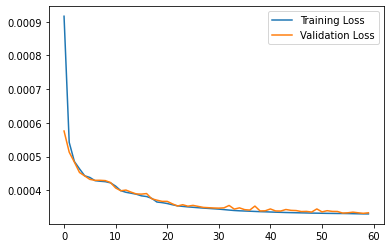

In [ ]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()

Additional metrics and checking

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [ ]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

Percentage of negative points

In [ ]:
sum([decoded_imgs[j][i] < 0 for i in range(len(decoded_imgs[0])) for j in range(len(decoded_imgs))]) / (len(decoded_imgs)*128)

0.46348681859334795

### Saving the model

In [ ]:
autoencoder.save('autoencoder_model_100_noreg.h5')

In [ ]:
# saving in json format
json_model = autoencoder.to_json()
json_file = open('autoencoder_json_100_noreg.json', 'w')
json_file.write(json_model)

3350

In [ ]:
# saving model weights
autoencoder.save_weights('autoencoder_weights_100_noreg.h5')

## Evaluating different models on fountain data to choose one

In [ ]:
import pandas as pd

In [ ]:
cd /gdrive/My Drive/3DAR_project/test_data/fountain_data/

/gdrive/.shortcut-targets-by-id/1nl7Gp0oMlyRlWl7RuNHeJ5o1UaSHy5cf/3DAR_project/test_data/fountain_data


In [ ]:
ls

 fountain_data.csv  'fountain_data - ridotti.csv'


In [ ]:
fd = pd.read_csv("fountain_data.csv", header=None)
fd

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127
0,-0.000053,0.000131,-0.000412,0.001678,-0.000476,0.000550,-0.000751,0.000792,-0.000108,0.003647,-0.000183,0.005521,-0.002943,0.003420,-0.001338,0.001974,0.003282,0.005660,0.001666,0.004730,-0.005501,0.007538,-0.002305,0.004255,-0.000066,0.000552,-0.000550,0.000833,0.000290,0.000446,-0.001776,0.002001,0.004624,0.014394,-0.004730,0.012954,0.001342,0.005520,0.000571,0.002017,...,0.000850,0.010588,-0.033089,0.036680,-0.010529,0.020242,-0.025091,0.027634,-0.000567,0.000643,-0.000994,0.001357,-0.000092,0.000166,0.000089,0.000655,0.001517,0.008022,-0.000504,0.005586,0.001159,0.004589,-0.000671,0.004476,0.000922,0.011852,-0.002579,0.006215,0.003003,0.005067,0.000304,0.001577,0.000269,0.000470,0.000547,0.000923,-0.000722,0.000794,-0.000055,0.000117
1,-0.000096,0.000584,-0.000191,0.000478,-0.000091,0.000349,0.000018,0.000650,0.008138,0.015660,-0.004488,0.005346,0.001918,0.005021,-0.001181,0.005310,0.000173,0.012407,-0.004653,0.004689,0.001833,0.001869,0.002902,0.006862,0.000773,0.001235,-0.000742,0.000960,0.000966,0.001367,-0.000452,0.000825,-0.001195,0.003145,-0.006235,0.009069,0.000984,0.001654,-0.000688,0.002177,...,-0.017895,0.027348,-0.043064,0.047358,-0.001882,0.006009,-0.008223,0.038634,0.002174,0.002220,-0.000287,0.000427,0.000786,0.000988,-0.000167,0.000186,-0.003458,0.006822,-0.003144,0.007113,-0.000783,0.007406,0.003170,0.008875,-0.004518,0.013706,-0.003916,0.003988,0.008691,0.008763,0.001774,0.005589,0.002095,0.002732,-0.000010,0.000165,0.002577,0.002672,0.000149,0.000262
2,-0.000057,0.000379,0.000949,0.001214,-0.000341,0.000381,0.000026,0.000041,0.048642,0.049957,0.003486,0.009805,0.000718,0.004365,-0.001757,0.001999,0.000580,0.000639,-0.054406,0.056872,-0.000201,0.000445,-0.005596,0.005596,0.003140,0.003554,0.001619,0.003795,0.000485,0.001395,0.000030,0.000079,-0.002249,0.004602,0.004137,0.005856,-0.000545,0.000759,0.000380,0.000692,...,0.003049,0.005298,-0.080179,0.081304,0.000304,0.001148,-0.021330,0.021501,-0.001569,0.001639,-0.000023,0.000320,-0.000071,0.000084,-0.000004,0.000179,-0.020033,0.027956,0.018395,0.018395,-0.002564,0.003122,0.004871,0.004871,0.061643,0.061643,-0.016211,0.016256,0.009858,0.009993,-0.004281,0.004281,0.000218,0.000396,-0.005868,0.005878,0.000316,0.000338,0.000048,0.001236
3,-0.000161,0.000251,-0.000748,0.001146,0.000265,0.000699,-0.001716,0.001904,0.032159,0.034360,0.000707,0.002794,0.042436,0.044318,0.000687,0.002434,-0.007357,0.013982,-0.030160,0.052664,0.006490,0.027178,-0.000869,0.009513,-0.000201,0.000573,0.000137,0.000604,0.000651,0.001596,-0.000739,0.001095,-0.026389,0.027337,-0.007644,0.008481,0.000308,0.001145,0.005165,0.017350,...,-0.003054,0.003744,-0.036088,0.037713,-0.000875,0.002870,-0.030441,0.032575,0.000077,0.000818,-0.001403,0.001682,0.000905,0.001167,-0.002048,0.002782,0.002873,0.004057,-0.002576,0.005574,0.002583,0.004463,-0.003651,0.004647,-0.004948,0.021135,0.000189,0.000876,0.015849,0.016397,0.010367,0.011415,0.000692,0.000876,-0.000370,0.003390,0.000507,0.000659,-0.001700,0.001907
4,-0.000800,0.001233,-0.000058,0.000438,-0.000014,0.000162,0.000653,0.000917,0.001383,0.004833,-0.000819,0.009520,-0.001612,0.006636,-0.006611,0.012841,0.000517,0.001796,-0.008295,0.021930,-0.010696,0.018117,-0.009757,0.010349,-0.001734,0.002145,0.001232,0.001232,-0.000973,0.001046,0.001846,0.001846,0.000314,0.002602,-0.002966,0.009455,-0.003583,0.003583,-0.015166,0.018073,...,-0.009348,0.016077,-0.010552,0.035366,-0.026948,0.035178,-0.002327,0.010903,-0.000172,0.000708,-0.000013,0.000550,-0.000289,0.000290,0.000003,0.000420,0.001258,0.003380,0.033741,0.036065,-0.042010,0.046024,0.001558,0.001742,0.008626,0.019011,-0.054141,0.059639,0.016653,0.024271,-0.010368,0.020780,-0.000441,0.001029,-0.001248,0.001538,0.000125,0.000271,-0.000775,0

In [ ]:
cd ../..

/gdrive/.shortcut-targets-by-id/1nl7Gp0oMlyRlWl7RuNHeJ5o1UaSHy5cf/3DAR_project


In [ ]:
ls

autoencoder_json_100.json        autoencoder_model_tanh.h5
autoencoder_json_100_noreg.json  autoencoder_weights_100.h5
autoencoder_json_60.json         autoencoder_weights_100_noreg.h5
autoencoder_model_100.h5         autoencoder_weights_60.h5
autoencoder_model_100_noreg.h5   castle_keypoints/
autoencoder_model_60.h5          portello_keypoints/
autoencoder_model.h5             test_data/


Loading the models

In [ ]:
from keras.models import load_model

In [ ]:
ae100 = load_model('autoencoder_model_100.h5')

In [ ]:
ls

autoencoder_json_100.json        autoencoder_model_tanh.h5
autoencoder_json_100_noreg.json  autoencoder_weights_100.h5
autoencoder_json_60.json         autoencoder_weights_100_noreg.h5
autoencoder_model_100.h5         autoencoder_weights_60.h5
autoencoder_model_100_noreg.h5   castle_keypoints/
autoencoder_model_60.h5          portello_keypoints/
autoencoder_model.h5             test_data/


In [ ]:
autoencoder.summary()

Model: "model_50"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_36 (InputLayer)        [(None, 128)]             0         
_________________________________________________________________
dense_103 (Dense)            (None, 32)                4128      
_________________________________________________________________
dense_104 (Dense)            (None, 64)                2112      
_________________________________________________________________
dense_105 (Dense)            (None, 32)                2080      
_________________________________________________________________
dense_106 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_107 (Dense)            (None, 64)                2112      
_________________________________________________________________
dense_108 (Dense)            (None, 128)               832

In [ ]:
preds = autoencoder.predict(fd)
preds

array([[ 6.7927252e-04,  3.4320152e-03,  1.0285748e-04, ...,
         3.8514643e-03, -2.7764402e-04,  1.9971952e-03],
       [ 1.1132676e-03,  2.3588280e-03, -4.9549103e-04, ...,
         3.5093802e-03,  1.9219518e-04,  3.1368646e-03],
       [-6.4802857e-04,  3.2278902e-03, -4.3588883e-04, ...,
         1.1202800e-03,  1.2973137e-04,  1.1284159e-03],
       ...,
       [-1.0216082e-03,  4.2496081e-03,  1.0930945e-04, ...,
         3.4559611e-04,  2.4647638e-04,  3.2704324e-05],
       [ 6.9955538e-04,  3.8901188e-03, -5.8570330e-04, ...,
         2.3384830e-03,  6.4498733e-04,  1.0411845e-03],
       [ 6.6045101e-04,  3.9699455e-03, -3.3375409e-03, ...,
         4.7228474e-04,  5.8144331e-05,  4.4659889e-04]], dtype=float32)

In [ ]:
m100 = preds[0]
m100

array([ 6.79272518e-04,  3.43201519e-03,  1.02857477e-04,  3.45423887e-03,
        3.10887583e-04,  2.64576194e-03, -1.09828683e-03,  2.10782024e-03,
        2.69101653e-03,  2.45565362e-02, -5.38574159e-03,  2.09986698e-02,
        5.23110479e-03,  2.01774277e-02, -3.01842554e-03,  1.88484192e-02,
        6.24868786e-03,  3.54485475e-02, -5.54857019e-04,  2.83746570e-02,
        6.04592147e-04,  2.70281639e-02, -2.23422423e-03,  2.39779521e-02,
       -6.06803107e-04,  4.09742445e-03,  3.32103111e-04,  3.58640146e-03,
        1.77350768e-04,  3.91296158e-03, -1.36290182e-04,  3.68277356e-03,
        2.14002864e-03,  2.38247942e-02, -4.65448154e-03,  2.34600771e-02,
        2.76802108e-03,  1.43525098e-02, -3.75931012e-03,  1.47239855e-02,
        1.87690467e-01,  2.51567900e-01,  4.25044894e-02,  1.36889890e-01,
        1.01756126e-01,  1.78846747e-01, -2.39494815e-02,  4.74450439e-02,
       -3.74883227e-02,  3.76773506e-01, -3.04853879e-02,  6.91567510e-02,
        9.72470492e-02,  

In [ ]:
ae_noreg = load_model("autoencoder_model_100_noreg.h5")

In [ ]:
preds = ae_noreg.predict(fd)
preds

array([[-6.1597268e-04,  3.2828951e-03, -9.7781932e-04, ...,
         4.3426477e-03, -3.4871511e-05,  3.2240043e-03],
       [ 8.1872608e-04,  2.1339396e-03, -1.4912641e-03, ...,
         4.9485564e-03,  5.0995499e-05,  4.4705910e-03],
       [-1.8671434e-04,  2.7309055e-03, -1.5340081e-03, ...,
         1.6000993e-03, -9.2931802e-04,  2.4077340e-03],
       ...,
       [-1.0731692e-03,  4.3411269e-03, -1.0430380e-03, ...,
         8.9292199e-04, -5.9647486e-05,  1.6090398e-03],
       [ 2.7375284e-04,  3.5018013e-03, -1.9643819e-03, ...,
         1.5129518e-03,  8.4351818e-04,  2.9282009e-03],
       [ 8.5451303e-04,  3.1774801e-03, -4.2718481e-03, ...,
         1.8612850e-03, -1.8271711e-04,  1.4689878e-03]], dtype=float32)

In [ ]:
m100_noreg = preds[0]
m100_noreg

array([-6.15972676e-04,  3.28289508e-03, -9.77819320e-04,  3.35854595e-03,
        2.85529881e-04,  2.23679235e-03, -1.35504641e-04,  2.54202518e-03,
        3.22279474e-03,  1.99392550e-02, -3.61027755e-03,  2.21104212e-02,
        2.21385434e-03,  1.75465681e-02, -1.49958406e-03,  1.60589404e-02,
        5.88339008e-03,  3.24208476e-02,  2.56790570e-03,  2.89061777e-02,
       -2.09715962e-03,  2.09495630e-02, -2.16411520e-03,  2.07036026e-02,
       -6.26940164e-04,  4.76841768e-03,  4.74359840e-05,  3.46596306e-03,
        7.92194624e-05,  3.55407363e-03,  1.91236613e-04,  3.95245198e-03,
       -6.74894173e-03,  2.80497242e-02, -9.37232457e-04,  2.05570757e-02,
       -1.82271004e-04,  1.66322850e-02,  2.13079620e-05,  1.76278763e-02,
        1.69175535e-01,  2.33500555e-01,  4.09089290e-02,  1.46941349e-01,
        1.12359591e-01,  1.96108878e-01,  8.54484388e-04,  5.09355217e-02,
       -3.09821051e-02,  3.73137325e-01, -5.30461408e-03,  5.83992265e-02,
        1.03266783e-01,  

In [ ]:
ae60 = load_model("autoencoder_model_60.h5")

In [ ]:
preds = ae60.predict(fd)
m60 = preds[0]
m60

array([-2.07117270e-03,  4.46574716e-03, -1.16668572e-03,  3.76533205e-03,
       -1.15684234e-05,  1.53731590e-03,  1.02356495e-03,  3.24417045e-03,
        2.31487979e-03,  2.12166775e-02,  1.46616891e-03,  2.62208264e-02,
       -3.40767554e-03,  2.24973764e-02,  1.26295409e-03,  2.04917304e-02,
       -6.03809778e-04,  3.11516561e-02,  2.87560304e-03,  2.63122451e-02,
       -8.99710041e-03,  2.75970083e-02,  2.05145450e-04,  2.62451954e-02,
        2.84917653e-04,  4.74575860e-03,  3.19687650e-04,  5.04790759e-03,
        2.12999061e-04,  4.50112205e-03, -3.22926324e-04,  3.04378639e-03,
       -8.04201700e-03,  2.72889622e-02, -6.69875788e-03,  2.11214162e-02,
        6.86527113e-04,  1.10115791e-02,  2.09491700e-04,  1.75653528e-02,
        1.87556699e-01,  2.41549447e-01,  4.30440903e-02,  1.51325032e-01,
        1.01756245e-01,  1.65361106e-01, -8.68636370e-03,  6.04897961e-02,
       -3.22412811e-02,  3.77459377e-01, -1.11956755e-02,  4.77539524e-02,
        1.22426748e-01,  

Comparing predicted values

In [ ]:
print(m100[:10], m100_noreg[:10], m60[:10], sep='\n')
fd.iloc[0,:][:10]

[ 0.00067927  0.00343202  0.00010286  0.00345424  0.00031089  0.00264576
 -0.00109829  0.00210782  0.00269102  0.02455654]
[-0.00061597  0.0032829  -0.00097782  0.00335855  0.00028553  0.00223679
 -0.0001355   0.00254203  0.00322279  0.01993925]
[-2.0711727e-03  4.4657472e-03 -1.1666857e-03  3.7653320e-03
 -1.1568423e-05  1.5373159e-03  1.0235650e-03  3.2441705e-03
  2.3148798e-03  2.1216678e-02]


0   -0.000053
1    0.000131
2   -0.000412
3    0.001678
4   -0.000476
5    0.000550
6   -0.000751
7    0.000792
8   -0.000108
9    0.003647
Name: 0, dtype: float64

Evaluations; on reduced and full fountain data

In [ ]:
ae100.evaluate(x=fd, y=fd)

8848/8848 [==============================] - 10s 1ms/step - loss: 3.1509e-04 - accuracy: 0.8249 - mse: 2.9898e-04


[0.0003150937845930457, 0.8248728513717651, 0.00029898027423769236]

In [ ]:
ae_noreg.evaluate(x=fd, y=fd)

10/10 [==============================] - 0s 2ms/step - loss: 1.6876e-04 - accuracy: 0.6500 - mse: 1.6876e-04


[0.00016875953588169068, 0.6499999761581421, 0.00016875953588169068]

In [ ]:
ae_noreg.evaluate(x=fd, y=fd)

8848/8848 [==============================] - 10s 1ms/step - loss: 2.6842e-04 - accuracy: 0.8351 - mse: 2.6842e-04


[0.00026841601356863976, 0.8351264595985413, 0.00026841601356863976]

In [ ]:
ae60.evaluate(x=fd, y=fd)

10/10 [==============================] - 0s 1ms/step - loss: 2.4581e-04 - accuracy: 0.6867 - mse: 2.2903e-04


[0.00024580518947914243, 0.6866666674613953, 0.00022902920318301767]

In [ ]:
ae60.evaluate(x=fd, y=fd)

8848/8848 [==============================] - 10s 1ms/step - loss: 3.2822e-04 - accuracy: 0.8160 - mse: 3.1156e-04


[0.00032821547938510776, 0.815986156463623, 0.0003115581930615008]

In [ ]:
ls

shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory
autoencoder_json_100.json        autoencoder_model_tanh.h5
autoencoder_json_100_noreg.json  autoencoder_weights_100.h5
autoencoder_json_60.json         autoencoder_weights_100_noreg.h5
autoencoder_model_100.h5         autoencoder_weights_60.h5
autoencoder_model_100_noreg.h5   castle_keypoints/
autoencoder_model_60.h5          portello_keypoints/
autoencoder_model.h5             test_data/


In [ ]:
ae_tanh = load_model("autoencoder_model_tanh.h5")

In [ ]:
ae_tanh.evaluate(x=fd, y=fd)

10/10 [==============================] - 0s 2ms/step - loss: 6.6304e-04


0.0006630351417697966

In [ ]:
fd.

0     -0.000053
1     -0.000096
2     -0.000057
3     -0.000161
4     -0.000800
         ...   
295   -0.003381
296    0.000213
297   -0.003398
298   -0.000925
299    0.001129
Name: 0, Length: 300, dtype: float64

In the end the autoencoder without regularization trained for 100 epochs outperforms the other model configurations.

## Training another model to check one more time

In [ ]:
ls

autoencoder_json_100.json        autoencoder_model_tanh.h5
autoencoder_json_100_noreg.json  autoencoder_weights_100.h5
autoencoder_json_60.json         autoencoder_weights_100_noreg.h5
autoencoder_model_100.h5         autoencoder_weights_60.h5
autoencoder_model_100_noreg.h5   castle_keypoints/
autoencoder_model_60.h5          portello_keypoints/
autoencoder_model.h5             test_data/


In [ ]:
cd castle_keypoints/castle_threshold/

/gdrive/.shortcut-targets-by-id/1nl7Gp0oMlyRlWl7RuNHeJ5o1UaSHy5cf/3DAR_project/castle_keypoints/castle_threshold


In [ ]:
df = pd.read_csv("everything_thres.csv", header=None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127
0,-0.000467,0.000541,-0.000916,0.001874,-0.000557,0.000674,-0.000916,0.001525,0.003079,0.007687,0.004420,0.009365,-0.002322,0.010495,0.001423,0.008381,0.001434,0.011819,0.001455,0.003266,0.020643,0.026999,0.010237,0.014624,-0.001035,0.001508,-0.000206,0.001023,-0.000163,0.000593,0.000703,0.002220,-0.002108,0.003846,-0.000428,0.004455,-0.000523,0.006677,-0.000680,0.005706,...,0.001429,0.008778,-0.003585,0.022425,-0.009046,0.013339,-0.012942,0.017980,-0.001339,0.002020,0.000110,0.000206,-0.000127,0.000249,0.001430,0.001758,0.015383,0.035254,0.002285,0.008953,0.008437,0.018605,0.008122,0.014362,0.001157,0.018010,-0.001854,0.021281,0.001419,0.037186,0.001077,0.019284,-0.000639,0.001723,-0.001433,0.002465,0.000404,0.001284,0.001272,0.001681
1,-0.000064,0.000116,0.000102,0.000121,-0.000033,0.000141,0.000005,0.000031,0.000388,0.000408,0.034773,0.034886,-0.008520,0.008662,0.000011,0.000049,0.001416,0.001638,0.041052,0.041052,-0.007911,0.007992,0.000125,0.000125,-0.000215,0.000220,-0.000003,0.000003,0.000016,0.000021,0.000133,0.000139,0.000436,0.001589,0.000288,0.000710,0.000664,0.002855,0.000320,0.003365,...,0.000065,0.001936,0.001152,0.001369,-0.000346,0.000594,0.000078,0.000296,0.000114,0.000134,0.000273,0.000275,-0.000072,0.000072,0.000004,0.000006,0.000388,0.000481,0.000256,0.000405,-0.000517,0.000517,-0.000149,0.000182,0.000322,0.000322,0.002089,0.002089,-0.001023,0.001037,0.000000,0.000000,0.000133,0.000222,0.000048,0.000049,-0.000043,0.000047,0.000011,0.000011
2,-0.005359,0.005522,0.000062,0.000170,0.000011,0.000030,0.000656,0.000672,-0.007444,0.010552,0.000968,0.000968,0.000953,0.001211,0.000537,0.000537,-0.001287,0.001287,0.078898,0.078898,-0.006903,0.006903,0.000402,0.000402,-0.000456,0.000460,-0.000067,0.000067,0.000009,0.000009,0.000273,0.000318,0.000612,0.001633,-0.019425,0.019979,-0.000732,0.003109,-0.020961,0.022130,...,-0.005379,0.005379,-0.000610,0.000660,-0.000244,0.000244,-0.000308,0.001053,-0.000055,0.000066,0.000133,0.000315,-0.000084,0.000088,-0.000076,0.000106,-0.000372,0.000372,0.001025,0.004044,-0.000604,0.000604,-0.000517,0.000688,-0.000068,0.000068,0.004727,0.004925,-0.002531,0.002531,-0.000081,0.000081,-0.000630,0.000630,0.000081,0.000089,-0.000116,0.000135,0.000275,0.000283
3,-0.000628,0.000679,-0.001923,0.002147,-0.000022,0.000022,-0.002288,0.002374,0.002550,0.003297,0.001471,0.002280,-0.000340,0.000987,-0.000012,0.000527,0.047226,0.048233,0.028858,0.028858,-0.002531,0.004161,0.000195,0.000195,-0.000192,0.000212,-0.000009,0.000009,0.000044,0.000044,0.000119,0.000130,0.001312,0.001401,-0.000016,0.000016,0.001631,0.001631,0.000141,0.000155,...,-0.003171,0.003383,-0.000913,0.000917,-0.000021,0.000092,0.000211,0.000677,-0.000207,0.000207,-0.000008,0.000018,-0.000009,0.000009,0.000012,0.000044,0.000588,0.000929,0.000840,0.001441,-0.001491,0.001491,-0.000084,0.000084,0.000960,0.000960,0.002905,0.002914,-0.001080,0.001166,-0.000005,0.000005,-0.000297,0.000579,0.000035,0.000076,-0.000061,0.000062,0.000078,0.000089
4,-0.000752,0.001523,-0.002438,0.002613,0.000003,0.000101,-0.000657,0.001161,-0.003638,0.015448,-0.010374,0.010452,0.002994,0.004199,0.002865,0.006705,0.008505,0.020461,0.003010,0.007048,0.006167,0.008682,0.011379,0.014959,0.000722,0.000890,-0.001270,0.003122,0.000093,0.000239,-0.000282,0.000367,0.006014,0.016557,-0.006759,0.024578,-0.005130,0.014665,-0.001821,0.006117,...,0.014478,0.017133,-0.001262,0.007902,-0.007848,0.033635,0.004014,0.005092,-0.000395,0.001190,0.000076,0.000076,0.002269,0.003015,0.003519,0.003519,-0.007458,0.008086,-0.007850,0.015362,0.003081,0.013513,0.020395,0.030949,0.003173,0.012893,0.006347,0.027082,-0.001666,0.014773,-0.002101,0.017713,0.002922,0.004339,0.002740,0.002842,-0.001665,0.003246,0.000590,0.001074
...,...,...

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test = train_test_split(df, test_size=0.05, random_state=42)
x_train.shape, x_test.shape

((79672, 128), (4194, 128))

In [ ]:
import keras
from keras import layers
from keras import regularizers

# This is the size of our encoded representations
encoding_dim = 32  # 20 floats -> compression of factor 6.4, assuming the input is 128 floats

# This is our input image
input = keras.Input(shape=(128,))
# "encoded" is the encoded representation of the input
encoded = layers.Dense(encoding_dim, activation='relu')(input)
#encoded = layers.Dense(encoding_dim, activation='relu',
#                activity_regularizer=regularizers.l1(10e-5))(input)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded = layers.Dense(32, activation='relu')(encoded)

# "decoded" is the lossy reconstruction of the input
decoded = layers.Dense(32, activation='relu')(encoded)
decoded = layers.Dense(64, activation='relu')(decoded)
decoded = layers.Dense(128, activation='tanh')(decoded)

# This model maps an input to its reconstruction
autoencoder = keras.Model(input, decoded)

# This model maps an input to its encoded representation
encoder = keras.Model(input, encoded)

autoencoder.compile(optimizer='adam', loss='mse', metrics=['accuracy', 'mse'])

n = 100
m = 256

In [ ]:
history = autoencoder.fit(x_train, x_train,
                epochs=n,
                batch_size=m,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/100
312/312 [==============================] - 2s 6ms/step - loss: 0.0034 - accuracy: 0.2134 - mse: 0.0034 - val_loss: 0.0010 - val_accuracy: 0.4542 - val_mse: 0.0010
Epoch 2/100
312/312 [==============================] - 1s 4ms/step - loss: 8.7079e-04 - accuracy: 0.4878 - mse: 8.7079e-04 - val_loss: 6.7647e-04 - val_accuracy: 0.5620 - val_mse: 6.7647e-04
Epoch 3/100
312/312 [==============================] - 1s 4ms/step - loss: 6.2467e-04 - accuracy: 0.5757 - mse: 6.2467e-04 - val_loss: 5.6922e-04 - val_accuracy: 0.6006 - val_mse: 5.6922e-04
Epoch 4/100
312/312 [==============================] - 1s 4ms/step - loss: 5.4725e-04 - accuracy: 0.6110 - mse: 5.4725e-04 - val_loss: 5.2172e-04 - val_accuracy: 0.6361 - val_mse: 5.2172e-04
Epoch 5/100
312/312 [==============================] - 1s 4ms/step - loss: 4.9905e-04 - accuracy: 0.6445 - mse: 4.9905e-04 - val_loss: 4.7517e-04 - val_accuracy: 0.6662 - val_mse: 4.7517e-04
Epoch 6/100
312/312 [==============================] - 1s 4ms

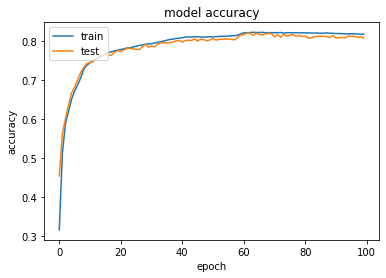

In [ ]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
autoencoder.evaluate(fd, fd)

8848/8848 [==============================] - 10s 1ms/step - loss: 3.1866e-04 - accuracy: 0.8040 - mse: 3.1866e-04


[0.0003186619724147022, 0.8040301203727722, 0.0003186619724147022]

No, the previous model was better.

## Testing on Tiso and Fountain

from keras.models import load_model

upload the model from folder

ae = load_model("autoencoder_model_100_noreg.h5")

usage: ae.predict(data)

In [ ]:
from keras.models import load_model

In [ ]:
ae = load_model("autoencoder_model_100_noreg.h5")

In [ ]:
ls

autoencoder_model_100_noreg.h5  fountain_data02.csv  fountain_data08.csv
fountain_data00.csv             fountain_data03.csv  fountain_data10.csv
fountain_data01.csv             fountain_data04.csv  sample_data/


In [ ]:
import glob
import pandas as pd

path = glob.glob("/content/*.csv")
csvs = []
for file in path:
    #print(file)
    csvs.append(pd.read_csv(file, header=None))

In [ ]:
csvs[-1]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127
0,0.000101,0.000120,-0.000038,0.000518,-0.000128,0.000312,-3.950989e-04,4.139157e-04,0.000386,0.001510,-0.000544,0.000824,0.002116,0.002833,0.000437,0.001439,0.013549,0.013678,-0.004287,0.004287,0.026493,0.026493,-0.004185,0.004549,0.000198,0.000618,-0.001107,0.001210,0.000509,0.000570,-1.205272e-03,0.001992,-0.000772,0.001308,-0.000075,0.000145,0.000449,0.000658,0.001329,0.001550,...,-0.010054,0.010589,-0.011047,0.011810,-0.000824,0.000876,0.002368,0.027778,0.000088,0.000095,0.000001,0.000001,0.000030,0.000075,0.000004,0.000004,0.000099,0.000163,0.008866,0.008947,-0.008519,0.008785,-0.000090,0.000154,-0.007973,0.008151,0.003038,0.009949,-0.004440,0.004735,0.010303,0.012336,0.001116,0.001295,0.000003,0.000040,0.001374,0.001421,0.000124,0.000129
1,0.000140,0.000147,0.000310,0.000310,-0.000214,0.000358,1.674278e-05,1.674278e-05,0.000680,0.007393,0.001139,0.016593,-0.002164,0.011232,-0.011131,0.011610,0.000171,0.004995,0.002274,0.005035,-0.005563,0.012290,-0.000694,0.009509,-0.000438,0.000503,0.000612,0.001807,-0.001175,0.001344,-5.496184e-04,0.001535,0.003038,0.003063,0.000880,0.000880,0.000789,0.001116,0.000012,0.000012,...,-0.042710,0.062531,-0.004615,0.029540,-0.009546,0.011897,0.016760,0.019127,0.000079,0.000100,-0.000006,0.000034,0.000060,0.000151,0.000003,0.000030,0.000318,0.000503,0.028957,0.029229,-0.002879,0.003324,-0.000236,0.000320,-0.025436,0.032043,0.003564,0.005150,-0.001625,0.004526,0.002924,0.003369,-0.003421,0.003425,0.012538,0.012605,-0.004758,0.004763,0.001003,0.001189
2,-0.000024,0.000046,0.000289,0.000422,-0.000215,0.000288,-1.138593e-04,1.918668e-04,0.034857,0.034949,0.011232,0.016532,0.025895,0.047529,-0.008132,0.008407,-0.031148,0.031148,-0.015125,0.015153,-0.000141,0.000141,0.023423,0.040433,-0.000216,0.000301,-0.000332,0.000519,-0.000209,0.000254,2.287308e-07,0.000434,0.000322,0.000583,0.000498,0.000930,-0.000354,0.000820,-0.000014,0.000237,...,0.001534,0.019214,-0.010423,0.019098,0.008063,0.015382,-0.004242,0.024119,0.000021,0.000021,-0.000150,0.000327,-0.001335,0.001350,-0.000831,0.000831,0.005553,0.005553,0.011482,0.015157,-0.017988,0.021582,-0.011049,0.011049,-0.000754,0.004814,0.010280,0.011232,-0.048449,0.052087,0.007253,0.014384,-0.001354,0.001355,-0.002829,0.002829,-0.000009,0.000010,-0.000294,0.008429
3,0.000800,0.000801,0.000002,0.000002,0.000444,0.000448,7.294392e-07,7.294392e-07,0.008927,0.050185,-0.005692,0.006728,0.021647,0.022583,0.014522,0.018052,0.003195,0.030826,-0.005400,0.007797,0.014611,0.018981,0.007774,0.013345,0.000594,0.002188,0.000941,0.002166,-0.000285,0.001557,3.140773e-04,0.000877,0.000858,0.000869,0.002850,0.002850,-0.001956,0.002244,0.000006,0.000006,...,-0.000211,0.002274,0.001173,0.001647,-0.000331,0.002182,0.000843,0.001318,0.000058,0.000074,0.000665,0.000690,-0.000184,0.000218,0.000005,0.000040,-0.000062,0.000062,-0.005845,0.019616,-0.006376,0.006376,-0.005368,0.005492,-0.014786,0.014812,0.034121,0.054908,-0.018844,0.018857,-0.006025,0.007034,-0.000210,0.000210,-0.000189,0.000295,-0.000113,0.000113,-0.000115,0.000270
4,-0.000005,0.000158,0.000309,0.000322,0.000013,0.000438,4.533712e-05,4.972497e-05,0.002556,0.004005,0.020257,0.023600,-0.005281,0.011165,-0.002710,0.003746,0.002406,0.007545,-0.001341,0.001910,0.002607,0.004112,0.007061,0.008684,-0.000999,0.003443,-0.000565,0.000565,0.000363,0.000363,1.588344e-03,0.001856,0.007707,0.007898,-0.006830,0.014020,0.009242,0.011120,-0.011377,0.011801,...,-0.000490,0.002068,-0.002059,0.006129,-0.001835,0.003272,-0.009412,0.010628,0.001147,0.001317,0.001234,0.002095,-0.000332,0.001577,-0.001286,0.001638,0.015440,0.019059,0.019144,0.023309,-0.008800,0.020293,-0.000973,0.008982,-0.001354,0.001354,-0.003479,0.035363,-0.025360,0.025360,-0.013097,0.014131,-0.000360,0.000394,0.

In [ ]:
import glob
import pandas as pd


In [ ]:
#path = glob.glob("/content/*.csv")
csv2s = []
for i in range(10):
    csv2s.append(pd.read_csv('fountain_data0'+str(i)+'.csv', header=None))
csv2s.append(pd.read_csv('fountain_data10.csv', header=None))

In [ ]:
len(csv2s)

11

In [ ]:
descriptors = ae.predict(csvs[0])
descriptors_next = ae.predict(csvs[1])

In [ ]:
#Packages to use SURF
!pip install opencv-python==3.4.2.17
!pip install opencv-contrib-python==3.4.2.17
#Getting a SURF descriptor
import cv2

     |████████████████████████████████| 25.0MB 1.3MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: opencv-python 4.1.2.30
    Uninstalling opencv-python-4.1.2.30:
      Successfully uninstalled opencv-python-4.1.2.30
     |████████████████████████████████| 30.6MB 110kB/s 
  Found existing installation: opencv-contrib-python 4.1.2.30
    Uninstalling opencv-contrib-python-4.1.2.30:
      Successfully uninstalled opencv-contrib-python-4.1.2.30


In [ ]:
from google.colab import files

In [ ]:
bf = cv2.BFMatcher()
m_file_name = "mmm.txt"
File_object = open(m_file_name, "w")
for k in range(len(csv2s)-1):
  fontana = csv2s[k]
  for i in range(k+1, len(csv2s)):
    fontana_next = csv2s[i]
    descriptors = ae.predict(fontana)
    descriptors_next = ae.predict(fontana_next)
    if(i>=10):
      File_object.write("000" + str(k) + ".jpg" + " 00" + str(i) + ".jpg" + "\n")
    else:
      File_object.write("000" + str(k) + ".jpg" + " 000" + str(i) + ".jpg" + "\n")
    matches = bf.knnMatch(descriptors,descriptors_next,k=2)
    good = []
    for m,n in matches:
      if m.distance < 0.75*n.distance:
        good.append(m)
    for j in range(len(good)):
      File_object.write(str(good[j].queryIdx) + " " + str(good[j].trainIdx)+ "\n")
    File_object.write("\n")
File_object.close()
File_object = open(m_file_name, "r")
File_object.read()
files.download(m_file_name)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The resulting file was saved and used for reconstruction.